In [1]:
from __future__ import division
import numpy as np
import cv2
import time
from matplotlib import pyplot as plt

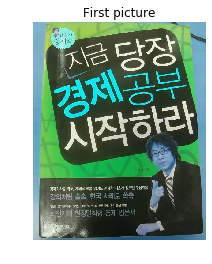

In [2]:
phoneImage = cv2.imread("book.jpg")

plt.figure()
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(phoneImage)           
plt.axis('off')
plt.title("First picture")
plt.show()


In [3]:
sift = cv2.xfeatures2d.SIFT_create()

Keypoints 1ST Image: 0
Keypoints 2ND Image: 950
GOOD Matches: 0


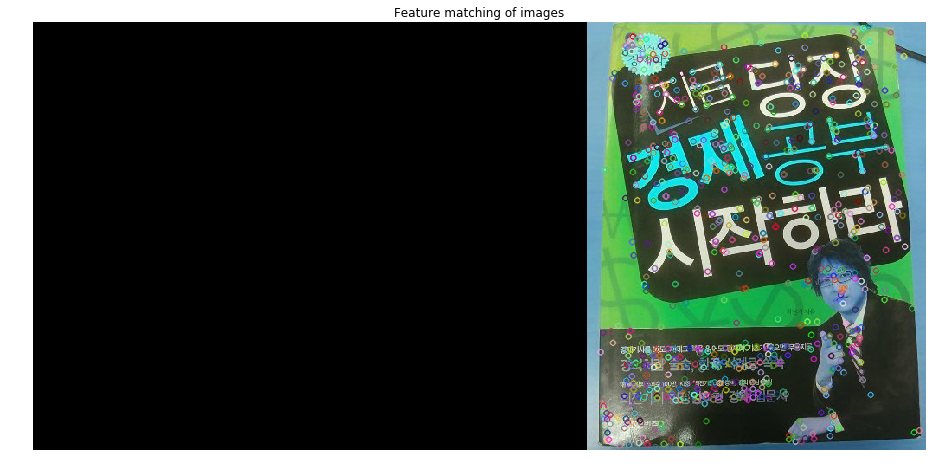

Keypoints 1ST Image: 653
Keypoints 2ND Image: 950
GOOD Matches: 143


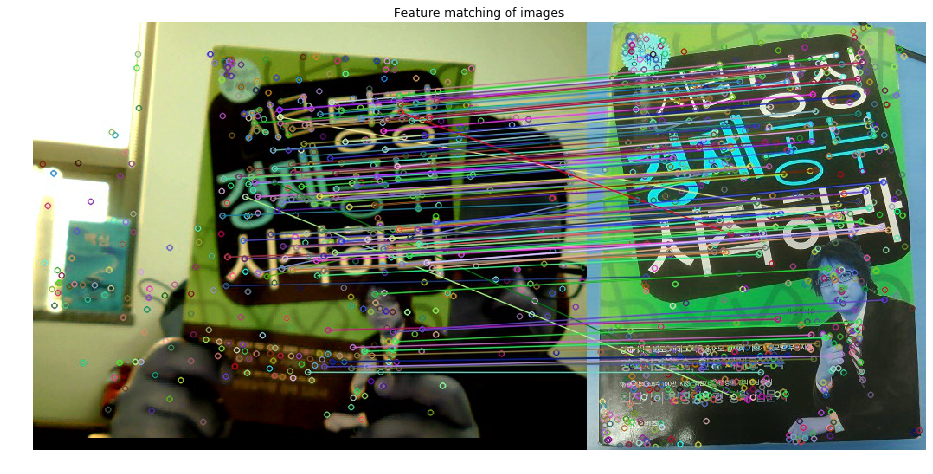

Keypoints 1ST Image: 687
Keypoints 2ND Image: 950
GOOD Matches: 126


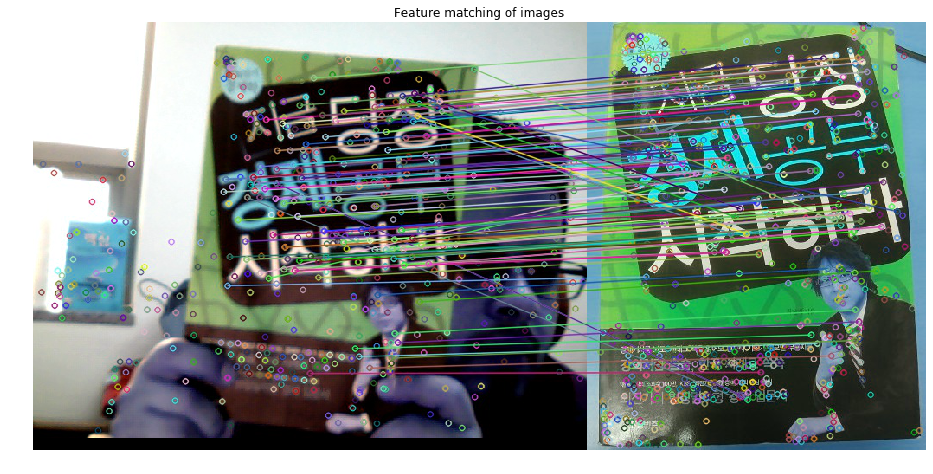

Keypoints 1ST Image: 692
Keypoints 2ND Image: 950
GOOD Matches: 122


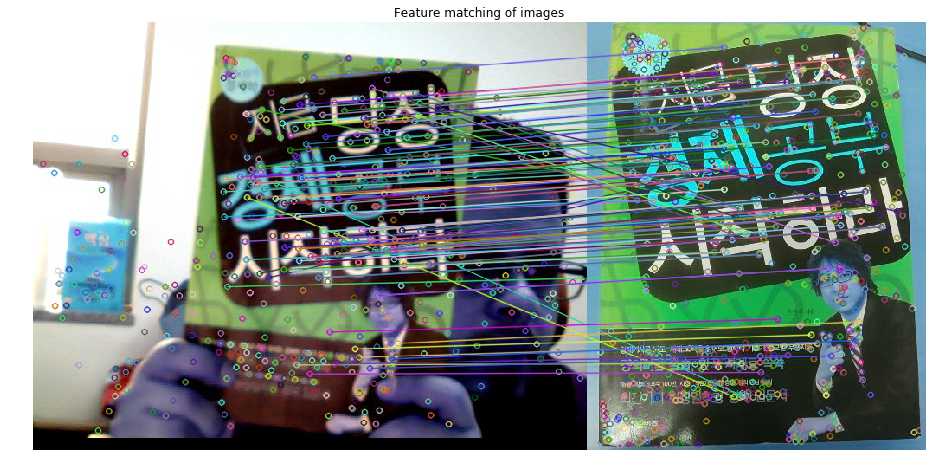

Keypoints 1ST Image: 672
Keypoints 2ND Image: 950
GOOD Matches: 116


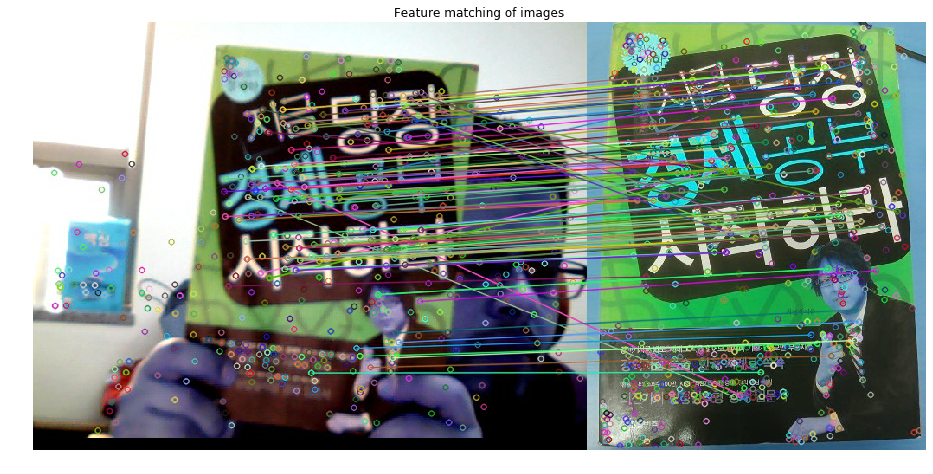

Keypoints 1ST Image: 676
Keypoints 2ND Image: 950
GOOD Matches: 111


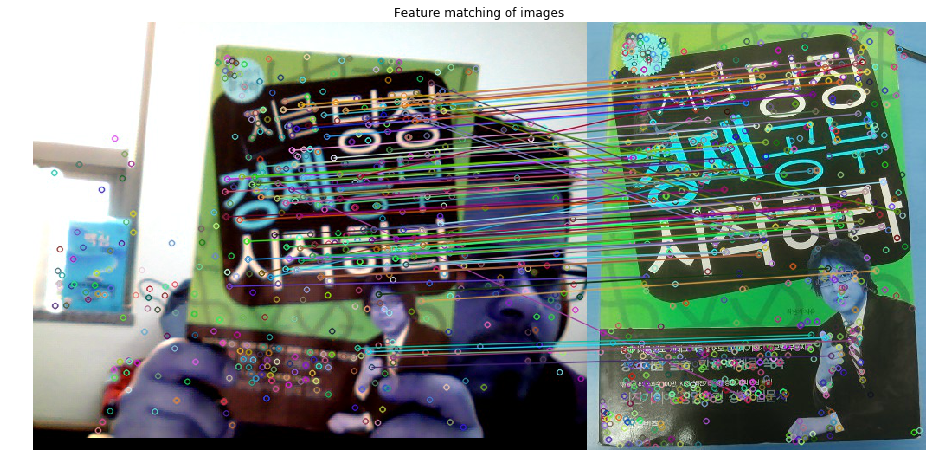

Keypoints 1ST Image: 690
Keypoints 2ND Image: 950
GOOD Matches: 118


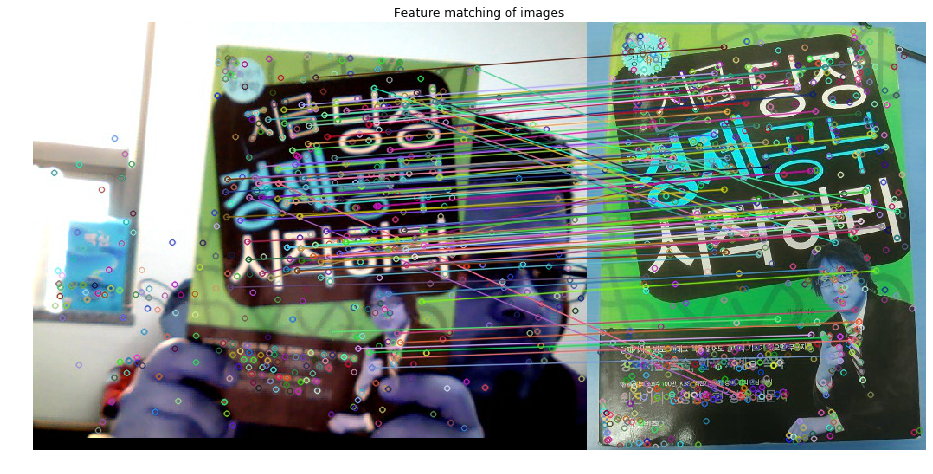

Keypoints 1ST Image: 635
Keypoints 2ND Image: 950
GOOD Matches: 96


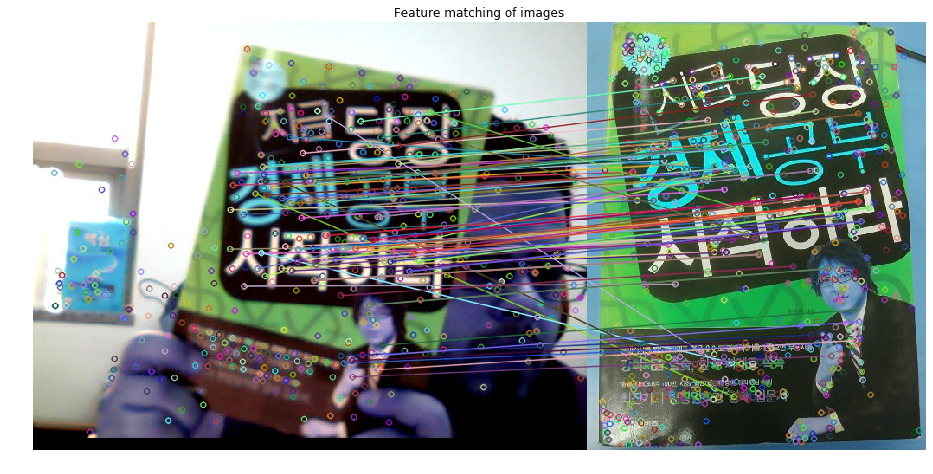

Keypoints 1ST Image: 652
Keypoints 2ND Image: 950
GOOD Matches: 107


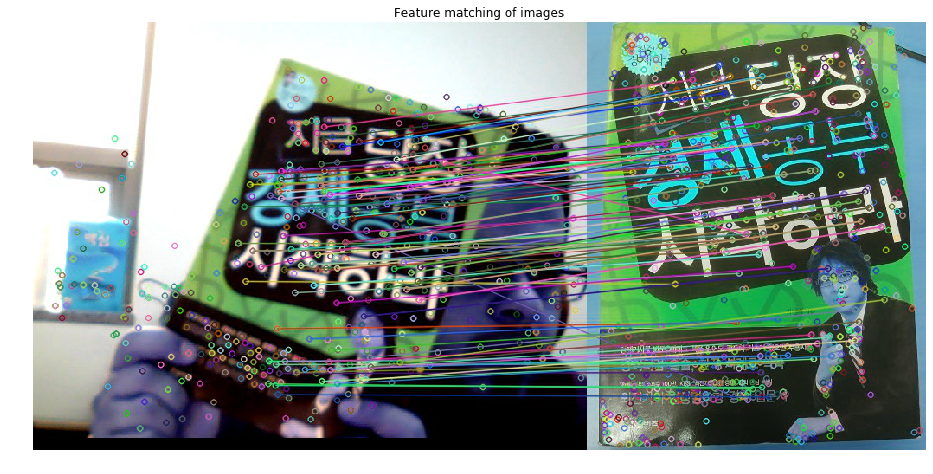

Keypoints 1ST Image: 681
Keypoints 2ND Image: 950
GOOD Matches: 114


KeyboardInterrupt: 

In [4]:
cap = cv2.VideoCapture(0)

while(cap.isOpened()):  # check !
    # capture frame-by-frame
    ret, frame = cap.read()

    if ret: # check ! (some webcam's need a "warmup")
        # our operation on frame come here
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        kp_1, desc_1 = sift.detectAndCompute(gray, None)
        kp_2, desc_2 = sift.detectAndCompute(phoneImage, None)
    
        index_params = dict(algorithm=0, trees=5)
        search_params = dict()
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(desc_1, desc_2, k=2)
        good_points = []
    
        for m, n in matches:
            if m.distance < 0.6*n.distance:
                good_points.append(m)
        # Define how similar they are
        #number_keypoints = 0
        #if len(kp_1) <= len(kp_2):
            #number_keypoints = len(kp_1)
        #else:
            #number_keypoints = len(kp_2)
        print("Keypoints 1ST Image: " + str(len(kp_1)))
        print("Keypoints 2ND Image: " + str(len(kp_2)))
        print("GOOD Matches:", len(good_points))
        #print("How good it's the match: ", len(good_points) / number_keypoints * 100)
        result = cv2.drawMatches(frame, kp_1, phoneImage, kp_2, good_points, None)
        cv2.imshow("result", cv2.resize(result, None, fx=0.4, fy=0.4))
        cv2.imwrite("00000000.jpg", result)
        #cv2.waitKey(0)

        feature_matching_of_images = cv2.imread("00000000.jpg")

        plt.figure()
        plt.rcParams["figure.figsize"] = (16,25)
        plt.imshow(feature_matching_of_images)    
        plt.axis('off')
        plt.title("Feature matching of images")
        plt.show()

        # Display the resulting frame
        cv2.imshow('frame', gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
# When everything is done release the capture
cap.release()
cv2.destroyAllWindows()